In [4]:
import pandas as pd
import numpy as np

In [5]:
def CDS_code_maker(CC, DC, SC):
    if len(str(int(CC)))<2:
        CC = '0'+ str(int(CC))
    else:
        CC = str(int(CC))
    DC = str(int(DC))
    if len(str(int(SC)))<7:
        SC = '0'*(7-len(str(int(SC))))+ str(int(SC))
    else:
        SC = str(int(SC))
    if len(CC+DC+SC) != 14:
        print(CC+DC+SC)
    return CC+DC+SC

In [6]:
path = 'CA_edu_data/'

In [7]:
numeric = ['CohortStudents', 'RegularHSGradCount',
       'RegularHSGradRate', 'MetUCCSUCount', 'MetUCCSURate',
       'SealOfBiliteracyCount', 'SealOfBiliteracyRate',
       'GoldenStateSealMeritCount', 'GoldenStateSealMeritRate',
       'CHSPECompleterCount', 'CHSPECompleterRate', 'AdultEdDiplomaCount',
       'AdultEdDiplomaRate', 'SPEDCertificateCount', 'SPEDCertificateRate',
       'GEDCompleterCount', 'GEDCompleterRate', 'OtherTransferCount',
       'OtherTransferRate', 'DropoutCount', 'DropoutRate',
       'StillEnrolledCount', 'StillEnrolledRate']

In [8]:
grad_rates = pd.read_table(path+'grad_rates_cohort1617.txt', sep = '\t')
grad_rates = grad_rates[(grad_rates.AggLevel == 'S') & (grad_rates.DASSYN == 'No')& (grad_rates.CharterYN != 'All')]
grad_rates['CDS'] = [CDS_code_maker(grad_rates.CountyCode.iloc[ik], grad_rates.DistrictCode.iloc[ik], grad_rates.SchoolCode.iloc[ik]) for ik in range(len(grad_rates))]
grad_rates.reset_index()
grad_rates.set_index('CDS')

for col in numeric:
    try: 
        grad_rates[col] = grad_rates[col].str.replace("*", "0")
    except:
        print('no dice')
    grad_rates[col] = pd.to_numeric(grad_rates[col])

In [9]:
schools = grad_rates.groupby('CDS')
repcats = grad_rates.groupby('ReportingCategory')

In [182]:
len(repcats)

19

In [10]:
repcat_cols = ['CohortStudents', 'RegularHSGradCount','RegularHSGradRate', 'MetUCCSUCount', 'MetUCCSURate','DropoutCount', 'DropoutRate']
# gradmeta_cols = ['CountyName', 'DistrictName', 'SchoolName','CDS', 'CharterYN']

In [354]:
grad_rates2 = grad_rates[['CDS', 'CharterYN']].drop_duplicates()

for repcat in repcats:
    sub_df = repcat[1][['CDS']]
    sub_df.set_index(['CDS'])
    for col in repcat_cols:
        sub_df[col+ '_' + repcat[0]] = repcat[1][col]
    grad_rates2 = grad_rates2.join(sub_df.set_index(['CDS'], verify_integrity=True), on = ['CDS'], how = 'outer')

grad_rates2.reset_index()
grad_rates2 = grad_rates2.set_index(['CDS'])

# grad_rates2['CohortStudents_All'] = grad_rates2.CohortStudents_GF + grad_rates2.CohortStudents_GM

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [355]:
grad_rates2['CohortStudents_All'] = grad_rates2.CohortStudents_GF + grad_rates2.CohortStudents_GM
grad_rates2['RegularHSGradCount_All'] = grad_rates2.RegularHSGradCount_GF + grad_rates2.RegularHSGradCount_GM
grad_rates2['MetUCCSUCount_All'] = grad_rates2.MetUCCSUCount_GF + grad_rates2.MetUCCSUCount_GM
grad_rates2['RegularHSGradRate_All'] = grad_rates2.RegularHSGradCount_All / grad_rates2.CohortStudents_All
grad_rates2['MetUCCSURate_All'] = grad_rates2.MetUCCSUCount_All / grad_rates2.CohortStudents_All

In [356]:
grad_rates2 = grad_rates2.drop(['CharterYN'], axis= 1)

In [156]:
def split_GS(grades_vect):

    def splitter(offered):
        try:
            [min_grade, max_grade] = offered.split('-')
            if min_grade == 'K':
                min_grade = 0
            if float(max_grade)>12:
                max_grade = 13
        except:
            [min_grade, max_grade] = [np.nan, np.nan]
        return min_grade, max_grade

    min_grdes = []
    max_grdes = []
    for ik in range(len(grades_vect)):
        min_grade, max_grade = splitter(grades_vect[ik])
        min_grdes.append(float(min_grade))
        max_grdes.append(float(max_grade))
        
    return min_grdes, max_grdes

In [230]:
school_meta = pd.read_table(path + 'pubschls.txt', sep = '\t')
school_meta = school_meta.rename(columns={'CDSCode':'CDS'})
school_meta['CDS'] = school_meta['CDS'].astype(str)#.apply(str)

In [289]:
HS = school_meta[(school_meta.EdOpsCode == 'TRAD') & 
                 (school_meta.EILCode == 'HS') & 
                 (school_meta.StatusType == 'Active')]

In [290]:
for ik in HS.index:
    if len(HS['CDS'][ik])<14:
        repl = '0'*(14-len(HS['CDS'][ik])) + HS['CDS'][ik]
        HS['CDS'][ik] = repl

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [291]:
HS['CharterYN'] = [1 if school== 'Y' else 0 for school in HS.Charter]
HS['MagnetYN'] = [1 if school== 'Y' else 0 for school in HS.Magnet]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [292]:
len(HS['CharterYN']), len(HS.Charter)

(1365, 1365)

In [148]:
meta_cols = ['CDS', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District',
       'School', 'City', 'Zip', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum',
       'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode',
       'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual',
       'Magnet', 'Latitude', 'Longitude', 'CharterYN', 'MagnetYN']

In [293]:
# _HS = HS

In [357]:
# HS = _HS

In [358]:
meta_cols = ['CDS', 'District', 'OpenDate',
             'CharterYN', 'MagnetYN', 'GSoffered', 'GSserved']

In [359]:
HS = HS[meta_cols]
HS.reset_index()
HS = HS.set_index('CDS')

In [360]:
min_grades, max_grades = split_GS(HS.GSoffered)
HS['GSoffered_min'] = min_grades
HS['GSoffered_max'] = max_grades

min_grades, max_grades = split_GS(HS.GSserved)
HS['GSserved_min'] = min_grades
HS['GSserved_max'] = max_grades

In [361]:
HS = HS[(HS.GSserved_min==9) & (HS.GSserved_max==12)]

In [362]:
HS = HS.join(grad_rates2, how= 'left')

In [32]:
EL_numeric = ['KDGN', 'GR_1',
       'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10',
       'GR_11', 'GR_12', 'UNGR', 'TOTAL_EL']

In [308]:
EL.columns

Index(['COUNTY', 'DISTRICT', 'SCHOOL', 'LC', 'LANGUAGE', 'KDGN', 'GR_1',
       'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10',
       'GR_11', 'GR_12', 'UNGR', 'TOTAL_EL'],
      dtype='object')

In [38]:
EL = pd.read_csv(path+ 'eng_learn1617_corr.csv')
for col in EL_numeric:
    EL[col] = pd.to_numeric(EL[col])
    
EL['CDS'] = EL['CDS'].apply(str)
EL.reset_index()
EL = EL.set_index(['CDS'])


In [197]:
# Number of languages with data
len(langs)


66

In [43]:
# EL.to_csv(path+'eng_learn1617_corr.csv')

In [363]:
lang_cols = ['GR_9', 'GR_10', 'GR_11', 'GR_12']
langs = EL.groupby('LANGUAGE')

HS2 = HS
langs_d =  {'lang' : [], 'total': []}
for lang in langs:
    sub_df = lang[1][lang_cols]
    sub_df = sub_df.reindex(columns=lang_cols+ ['ALL'])
    sub_df['ALL'] = lang[1]['GR_12']+lang[1]['GR_11']+ lang[1]['GR_10']+ lang[1]['GR_9']
    langs_d['lang'].append(lang[0])
    langs_d['total'].append(sum(sub_df['ALL']))
    sub_df = sub_df.rename(columns={col:col+ '_' + lang[0] for col in sub_df.columns})
    HS2 = HS2.join(sub_df)#.set_index(['CDS'], verify_integrity=True), on = ['CDS'], how = 'outer')
    HS2[sub_df.columns] = HS2[sub_df.columns].fillna(0)

In [433]:
HS2.columns[:50]

Index(['District', 'OpenDate', 'CharterYN', 'MagnetYN', 'GSoffered',
       'GSserved', 'GSoffered_min', 'GSoffered_max', 'GSserved_min',
       'GSserved_max', 'CohortStudents_GF', 'RegularHSGradCount_GF',
       'RegularHSGradRate_GF', 'MetUCCSUCount_GF', 'MetUCCSURate_GF',
       'DropoutCount_GF', 'DropoutRate_GF', 'CohortStudents_GM',
       'RegularHSGradCount_GM', 'RegularHSGradRate_GM', 'MetUCCSUCount_GM',
       'MetUCCSURate_GM', 'DropoutCount_GM', 'DropoutRate_GM',
       'CohortStudents_GN', 'RegularHSGradCount_GN', 'RegularHSGradRate_GN',
       'MetUCCSUCount_GN', 'MetUCCSURate_GN', 'DropoutCount_GN',
       'DropoutRate_GN', 'CohortStudents_RA', 'RegularHSGradCount_RA',
       'RegularHSGradRate_RA', 'MetUCCSUCount_RA', 'MetUCCSURate_RA',
       'DropoutCount_RA', 'DropoutRate_RA', 'CohortStudents_RB',
       'RegularHSGradCount_RB', 'RegularHSGradRate_RB', 'MetUCCSUCount_RB',
       'MetUCCSURate_RB', 'DropoutCount_RB', 'DropoutRate_RB',
       'CohortStudents_RD', 'Reg

In [364]:
HS2['Total_EL'] = [sum([HS2[HS2.index ==ind][col][0] if 'ALL_' in col else 0 for col in HS2.columns]) for ind in HS2.index]
HS2['Total_EL_9'] = [sum([HS2[HS2.index ==ind][col][0] if 'GR_9_' in col else 0 for col in HS2.columns]) for ind in HS2.index]
HS2['Total_EL_12'] = [sum([HS2[HS2.index ==ind][col][0] if 'GR_12_' in col else 0 for col in HS2.columns]) for ind in HS2.index]


In [445]:
HS_sub = HS2[['MetUCCSUCount_RH', 'Total_EL_12', 'CohortStudents_All', 'RegularHSGradCount_GF', 'MetUCCSUCount_All', 'District', 'CharterYN']]
# HS_sub.replace([np.inf, -np.inf], np.nan)

,MetUCCSUCount_RH,Total_EL_12,CohortStudents_All,RegularHSGradCount_GF,MetUCCSUCount_All,District,CharterYN
CDS,,,,,,,
01100170112607,36.0,10.0,81.0,32.0,66.0,Alameda County Office of Education,1
01611190130229,17.0,40.0,420.0,210.0,262.0,Alameda Unified,0
01611190130625,18.0,13.0,37.0,9.0,19.0,Alameda Unified,1
01611270130450,21.0,18.0,302.0,139.0,176.0,Albany City Unified,0
01611430131177,71.0,41.0,829.0,376.0,487.0,Berkeley Unified,0
01611500132225,77.0,31.0,708.0,352.0,408.0,Castro Valley Unified,0
01611680132746,0.0,4.0,37.0,11.0,11.0,Emery Unified,0
01611760130062,20.0,29.0,505.0,230.0,346.0,Fremont Unified,0
01611760134270,14.0,31.0,497.0,240.0,339.0,Fremont Unified,0


In [446]:
HS_sub['MetUCCSURate_RH']= HS_sub.MetUCCSUCount_RH/HS_sub.CohortStudents_All
HS_sub['RegularHSGradRate_GF'] = HS_sub.RegularHSGradCount_GF/HS_sub.CohortStudents_All
HS_sub['MetUCCSURate_All'] = HS_sub.MetUCCSUCount_All/HS_sub.CohortStudents_All

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [447]:
HS_sub.describe()


,MetUCCSUCount_RH,Total_EL_12,CohortStudents_All,RegularHSGradCount_GF,MetUCCSUCount_All,CharterYN,MetUCCSURate_RH,RegularHSGradRate_GF,MetUCCSURate_All
count,1103.000000,1156.000000,1104.000000,1104.000000,1104.000000,1156.000000,1085.000000,1083.000000,1083.000000
mean,71.853128,28.285467,339.566123,159.266304,169.077899,0.165225,inf,0.466968,0.496561
std,65.027149,31.331930,211.805439,101.919162,127.364246,0.371544,NaN,0.076555,0.196665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,6.000000,138.000000,68.000000,70.000000,0.000000,0.094444,0.440740,0.366747
50%,56.000000,18.000000,344.000000,157.500000,142.000000,0.000000,0.189349,0.470588,0.474708
75%,99.000000,40.000000,496.000000,231.250000,241.000000,0.000000,0.317972,0.497837,0.612172
max,441.000000,291.000000,1095.000000,517.000000,800.000000,1.000000,inf,1.000000,1.000000


In [460]:
HS_sub.columns


Index(['MetUCCSUCount_RH', 'Total_EL_12', 'CohortStudents_All',
       'RegularHSGradCount_GF', 'MetUCCSUCount_All', 'District', 'CharterYN',
       'MetUCCSURate_RH', 'RegularHSGradRate_GF', 'MetUCCSURate_All',
       'small_dist', 'big_dist', 'EL_GR12_rate'],
      dtype='object')

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

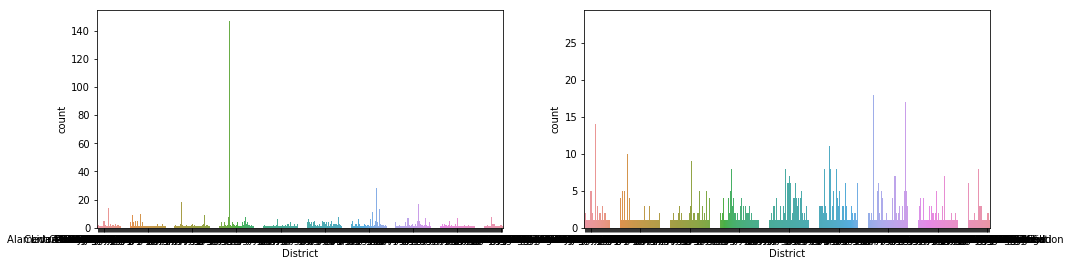

In [402]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
sns.countplot(data = HS_sub, x = 'District', ax = ax[0])
sns.countplot(data = HS_sub[HS_sub.District != 'Los Angeles Unified'], x = 'District', ax = ax[1])


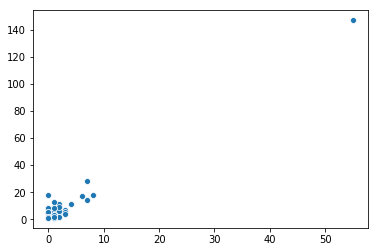

In [373]:
Districts = HS_sub.groupby('District')

num_charters = []
num_schools = []
for dist in Districts:
    num_schools.append(len(dist[1]))
    num_charters.append(sum(dist[1].CharterYN))

sns.scatterplot(x = num_charters, y = num_schools)


In [374]:
HS_sub.District.value_counts().head(10)


Los Angeles Unified        147
San Diego Unified           28
San Francisco Unified       18
Kern High                   18
East Side Union High        17
Oakland Unified             14
Sweetwater Union High       13
Sacramento City Unified     11
Grossmont Union High        11
Fresno Unified              10
Name: District, dtype: int64

1083 1156


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


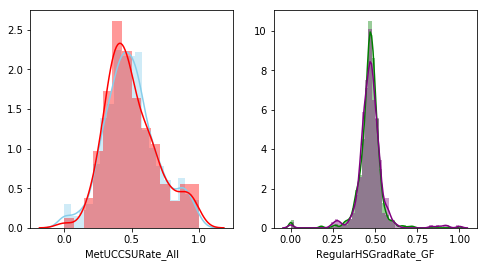

In [449]:
# Create a new variable seperating big schoool districts from small (which is to say Los Angeles from else)
x = []
for dist in HS_sub.groupby('District'):
    if len(dist[1])<8:
        x = x + [1]*len(dist[1])
    else:
        x = x + [0]*len(dist[1])

HS_sub['small_dist'] = x

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.small_dist == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.small_dist == 0]['MetUCCSURate_All'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.small_dist == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.small_dist == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility

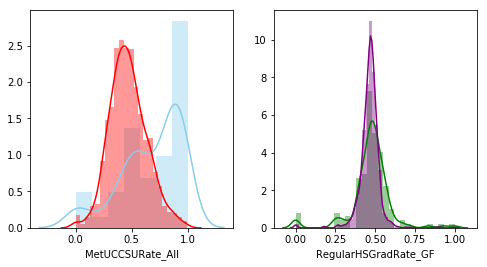

In [450]:
# print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
# sns.distplot(HS_sub[HS_sub.CharterYN == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue')
# sns.distplot(HS_sub[HS_sub.CharterYN == 0]['MetUCCSURate_All'].dropna(), color= 'red')

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
# print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.CharterYN == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.CharterYN == 0]['MetUCCSURate_All'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.CharterYN == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.CharterYN == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1083 1156


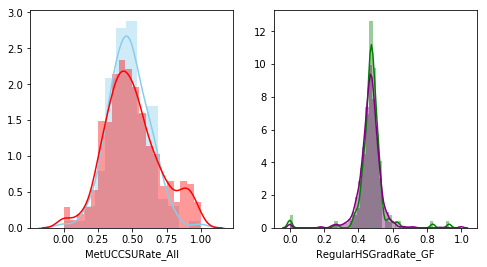

In [451]:
# Create a new variable seperating big schoool districts from small (which is to say Los Angeles from else)
x = []
for dist in HS_sub.groupby('District'):
    if len(dist[1])>30:
        x = x + [1]*len(dist[1])
    else:
         x = x + [0]*len(dist[1])

HS_sub['big_dist'] = x

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
print(len(HS_sub['MetUCCSURate_All'].dropna()), len(HS_sub['MetUCCSURate_All']))
sns.distplot(HS_sub[HS_sub.big_dist == 1]['MetUCCSURate_All'].dropna(), color= 'skyblue', ax = ax[0])
sns.distplot(HS_sub[HS_sub.big_dist == 0]['MetUCCSURate_All'].dropna(), color= 'red', ax = ax[0])

sns.distplot(HS_sub[HS_sub.big_dist == 1]['RegularHSGradRate_GF'].dropna(), color= 'green', ax = ax[1])
sns.distplot(HS_sub[HS_sub.big_dist == 0]['RegularHSGradRate_GF'].dropna(), color= 'purple', ax = ax[1])
# There is no number that demonstrates that school district size has an appreciable effect
# on UC/CSU eligibility

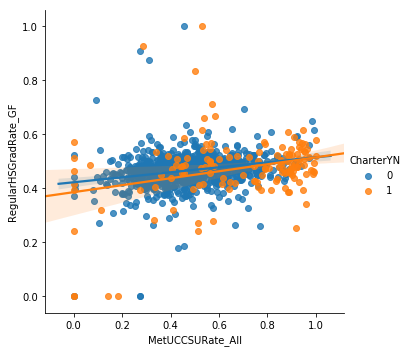

In [452]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'RegularHSGradRate_GF', hue = 'CharterYN')


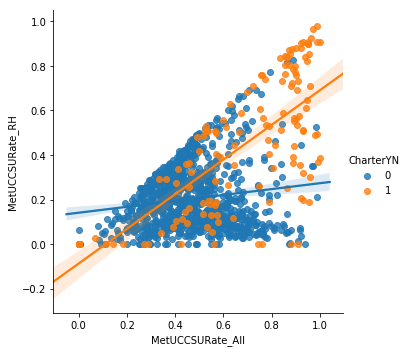

In [453]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'MetUCCSURate_RH', hue = 'CharterYN')


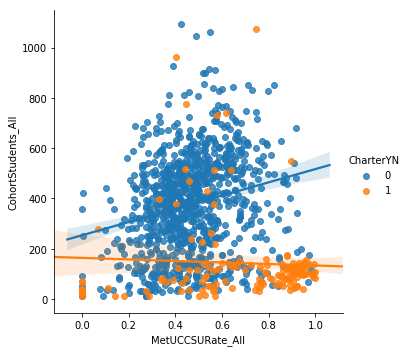

In [454]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'CohortStudents_All', hue = 'CharterYN')


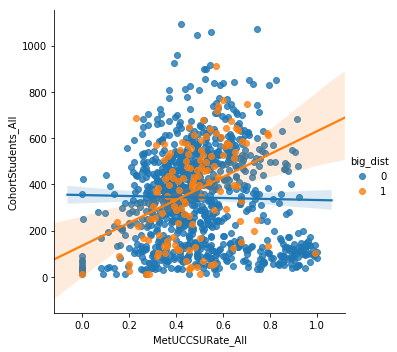

In [455]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'CohortStudents_All', hue = 'big_dist')


In [456]:
# created a variable that represents the percentage of the 12th grade who are ELs
x = []
for ik in range(len(HS_sub)):
    x.append(HS_sub['Total_EL_12'][ik]/HS_sub['CohortStudents_All'][ik])

HS_sub['EL_GR12_rate'] = x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


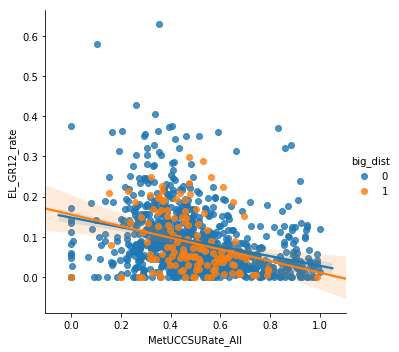

In [457]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'EL_GR12_rate', hue = 'big_dist')


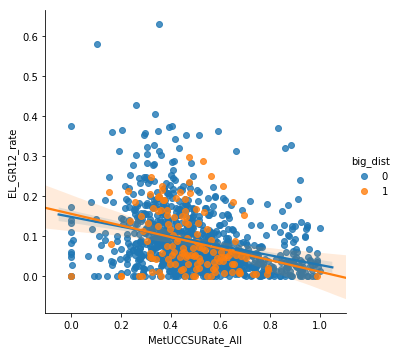

In [458]:
sns.lmplot(data = HS_sub, x = 'MetUCCSURate_All', y = 'EL_GR12_rate', hue = 'big_dist')


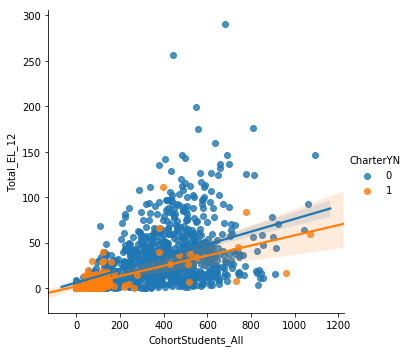

In [459]:
sns.lmplot(data = HS_sub, x = 'CohortStudents_All', y = 'Total_EL_12', hue = 'CharterYN')


In [429]:
HS3.columns

Index(['District', 'OpenDate', 'CharterYN', 'MagnetYN', 'GSoffered',
       'GSserved', 'GSoffered_min', 'GSoffered_max', 'GSserved_min',
       'GSserved_max',
       ...
       'GR_12_Vietnamese', 'ALL_Vietnamese', 'GR_9_Zapoteco', 'GR_10_Zapoteco',
       'GR_11_Zapoteco', 'GR_12_Zapoteco', 'ALL_Zapoteco', 'Total_EL',
       'Total_EL_9', 'Total_EL_12'],
      dtype='object', length=481)

In [430]:
HS3 = HS2
threshold = 0.2

# HS3 = HS3.drop(['NCESDist', 'NCESSchool', 'ClosedDate','DOC','SOC'], axis= 1)
HS3 = HS3.drop(HS3.std()[HS3.std() < threshold].index.values, axis=1)

In [434]:
HS3 = HS2
non_numeric = ['StatusType', 'County', 'District', 'School', 'City', 'Zip', 'OpenDate',
       'Charter', 'CharterNum', 'FundingType', 'DOCType', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'Latitude', 'Longitude', 'CharterYN']

non_numeric = ['District', 'OpenDate', 'GSoffered','GSserved']

HS3.drop(non_numeric + ["MetUCCSURate_All"], axis=1).apply(lambda x: x.corr(HS3.MetUCCSURate_All)).sort_values(ascending = False)


/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


MetUCCSURate_TA               0.976376
MetUCCSURate_GF               0.955825
MetUCCSURate_GM               0.949007
MetUCCSURate_SS               0.849399
MetUCCSURate_RH               0.815025
MetUCCSURate_SD               0.531043
MetUCCSURate_SE               0.477528
MetUCCSURate_RW               0.456218
MetUCCSUCount_SD              0.436970
MetUCCSUCount_GM              0.431773
MetUCCSUCount_All             0.391319
MetUCCSUCount_TA              0.391284
MetUCCSUCount_RW              0.365361
CharterYN                     0.355472
MetUCCSURate_RT               0.352674
MetUCCSUCount_GF              0.349656
MetUCCSUCount_RT              0.340229
RegularHSGradRate_TA          0.333662
RegularHSGradRate_All         0.329043
MetUCCSURate_RA               0.323728
MetUCCSUCount_RA              0.321140
RegularHSGradRate_GF          0.317065
RegularHSGradCount_RA         0.276634
RegularHSGradRate_GM          0.270559
CohortStudents_RA             0.269470
RegularHSGradCount_RT    

In [259]:
HS3.CharterYN

CDS
01100170112607    Yes
01611190130229     No
01611190130625    Yes
01611270130450     No
01611430131177     No
01611500132225     No
01611680132746     No
01611760130062     No
01611760134270     No
01611760134452     No
01611760135244     No
01611760138693     No
01611920108670    Yes
01611920127944    Yes
01611920133629     No
01611920135319     No
01611920138339     No
01612000133397     No
01612000134536     No
01612340130054     No
01612420134668     No
01612590100065    Yes
01612590100701     No
01612590108944    Yes
01612590110189     No
01612590111856    Yes
01612590114868    Yes
01612590115238    Yes
01612590125161     No
01612590125716     No
                 ... 
56725205634076     No
56725460120634    Yes
56725460131698    NaN
56725465630389     No
56725465631619     No
56725465631742     No
56725465632849     No
56725465634548     No
56725465634761     No
56726035630322     No
56726035635008     No
56726035636188     No
56726525630348     No
56726525630793     No
567265

In [257]:
HS3.columns[:50]

Index(['StatusType', 'County', 'District', 'School', 'City', 'Zip', 'OpenDate',
       'Charter', 'CharterNum', 'FundingType', 'DOCType', 'SOCType',
       'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved',
       'Virtual', 'Magnet', 'Latitude', 'Longitude', 'GSoffered_min',
       'CharterYN', 'CohortStudents_GF', 'RegularHSGradCount_GF',
       'RegularHSGradRate_GF', 'MetUCCSUCount_GF', 'MetUCCSURate_GF',
       'DropoutCount_GF', 'DropoutRate_GF', 'CohortStudents_GM',
       'RegularHSGradCount_GM', 'RegularHSGradRate_GM', 'MetUCCSUCount_GM',
       'MetUCCSURate_GM', 'DropoutCount_GM', 'DropoutRate_GM',
       'CohortStudents_GN', 'RegularHSGradCount_GN', 'RegularHSGradRate_GN',
       'MetUCCSUCount_GN', 'MetUCCSURate_GN', 'DropoutCount_GN',
       'DropoutRate_GN', 'CohortStudents_RA', 'RegularHSGradCount_RA',
       'RegularHSGradRate_RA', 'MetUCCSUCount_RA', 'MetUCCSURate_RA'],
      dtype='object')